In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(col, k = 1.5):
    
    ''' Take in a Pandas Series and a multiplier and returns upper and lower bound of the series using the IQR rule.'''
    
    #get q1, 25th percentile
    q1 = col.quantile(.25)
    
    #get q3, 75th percentile
    q3 = col.quantile(.75)
    
    #get IQR
    
    iqr = q3 - q1
    
    #get upper and lower bounds
    
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    return lower_bound, upper_bound

---

In [3]:
df = pd.read_csv('lemonade.csv')
df.head(1)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.0,15,0.5,10


In [4]:
df.tail()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [5]:
df.shape

(365, 7)

In [6]:
df.isna().sum()

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

In [7]:
#set date to datetime and set as index

df.Date = pd.to_datetime(df.Date)

df = df.set_index('Date')

#add month column since sales occur over one year
df['Month'] = df.index.month_name()

df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


---

#### Univariate Distributions

Day


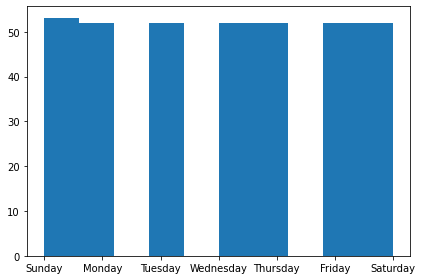

Temperature


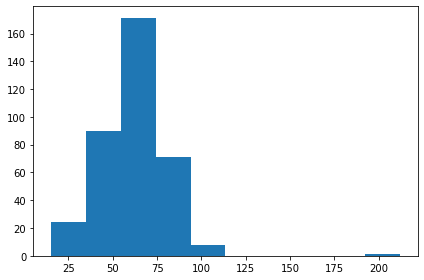

Rainfall


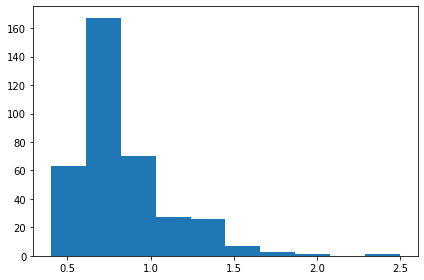

Flyers


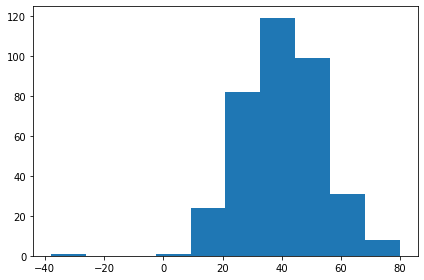

Price


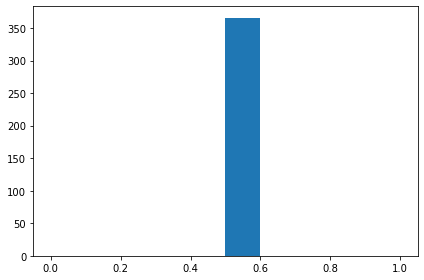

Sales


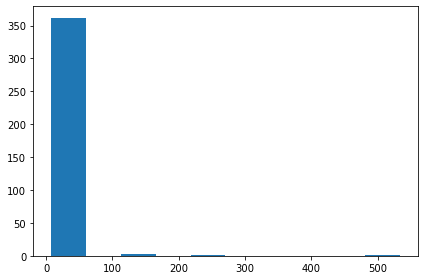

Month


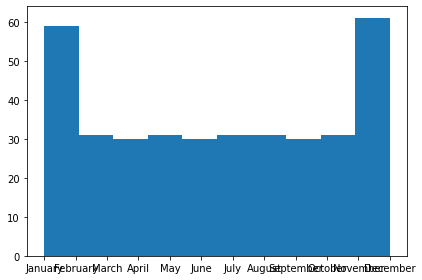

In [8]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.tight_layout()
    plt.show()

- There are outliers in in the flyers column due to negative flyers
- Temperature seems to have some high outliers
- Rainfall appears to have outliers
- Month has outliers in January and December, months not typically associated with high lemonade sales

---

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [9]:
get_lower_and_upper_bounds(df.Temperature, 1.5)

(16.700000000000003, 104.7)

In [10]:
df.Temperature.min()

15.1

In [11]:
df.loc[df['Month'] == 'December']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-12-01,Friday,48.7,1.00,34,0.5,19,December
2017-12-02,Saturday,44.1,1.11,35,0.5,17,December
2017-12-03,Sunday,33.5,1.18,19,0.5,15,December
2017-12-04,Monday,34.9,1.54,16,0.5,13,December
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December
2017-12-06,Wednesday,44.7,0.95,28,0.5,19,December
2017-12-07,Thursday,42.1,1.05,26,0.5,17,December
2017-12-08,Friday,40.5,1.25,30,0.5,15,December
2017-12-09,Saturday,31.2,1.43,19,0.5,14,December


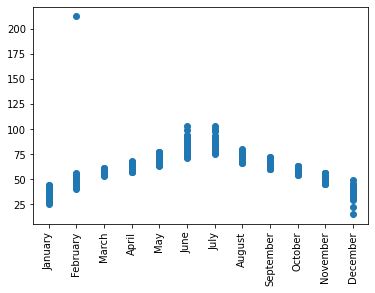

In [12]:
plt.scatter(df.Month, df.Temperature)
plt.xticks(rotation = 90)
plt.show()

- Keeping lower outliers in Temperature makes sense, since the lowest Temperature is in December, which is normal.

In [13]:
get_lower_and_upper_bounds(df.Rainfall, 1.5)

(0.26, 1.3)

In [14]:
df.Rainfall.min()

0.4

- Rainfall has no lower outliers.

In [15]:
get_lower_and_upper_bounds(df.Flyers, 1.5)

(4.0, 76.0)

In [16]:
df.Flyers.min()

-38

In [17]:
df.Flyers.idxmin()

Timestamp('2017-11-21 00:00:00')

In [18]:
df.loc[df['Month'] == 'November']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-01,Wednesday,51.9,0.83,43,0.5,23,November
2017-11-02,Thursday,53.6,0.91,46,0.5,22,November
2017-11-03,Friday,51.3,0.87,38,0.5,21,November
2017-11-04,Saturday,48.7,0.95,39,0.5,19,November
2017-11-05,Sunday,55.9,0.87,45,0.5,23,November
2017-11-06,Monday,51.6,0.91,28,0.5,22,November
2017-11-07,Tuesday,52.3,0.91,34,0.5,21,November
2017-11-08,Wednesday,44.7,0.95,37,0.5,19,November
2017-11-09,Thursday,53.9,0.83,33,0.5,23,November


- Flyers has a negative number, during November the number of fliers excluding the outlier ranges from 26 to 47, so the negative number was likely a mistake and should be corrected.

In [19]:
df.loc['2017-11-21'].Flyers

-38

In [20]:
#replace -38 w/ 38
#df.Flyers = df.Flyers.abs() can also get absolute value of whole column
df['Flyers'] = df['Flyers'].replace([-38], 38)

df.loc['2017-11-21'].Flyers

38

In [21]:
df.loc[df['Month'] == 'November']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-01,Wednesday,51.9,0.83,43,0.5,23,November
2017-11-02,Thursday,53.6,0.91,46,0.5,22,November
2017-11-03,Friday,51.3,0.87,38,0.5,21,November
2017-11-04,Saturday,48.7,0.95,39,0.5,19,November
2017-11-05,Sunday,55.9,0.87,45,0.5,23,November
2017-11-06,Monday,51.6,0.91,28,0.5,22,November
2017-11-07,Tuesday,52.3,0.91,34,0.5,21,November
2017-11-08,Wednesday,44.7,0.95,37,0.5,19,November
2017-11-09,Thursday,53.9,0.83,33,0.5,23,November


---

In [22]:
get_lower_and_upper_bounds(df.Price, 1.5)

(0.5, 0.5)

In [23]:
df.Price.max()

0.5

In [24]:
df.Price.min()

0.5

- Price stays the same, no outliers.

---

In [25]:
get_lower_and_upper_bounds(df.Sales, 1.5)

(5.0, 45.0)

In [26]:
df.Sales.min()

7

- Sales has no lower outliers.

---

Use the IQR Range Rule and the lower and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [27]:
get_lower_and_upper_bounds(df.Temperature, 1.5)

(16.700000000000003, 104.7)

In [28]:
df.Temperature.max()

212.0

In [29]:
df.Temperature.idxmax()

Timestamp('2017-02-11 00:00:00')

In [30]:
df.loc[df['Month'] == 'February'].Temperature.mean()

53.67142857142857

In [31]:
df.Temperature.resample('M').mean()

Date
2017-01-31    36.632258
2017-02-28    53.671429
2017-03-31    57.761290
2017-04-30    62.693333
2017-05-31    70.790323
2017-06-30    83.360000
2017-07-31    85.945161
2017-08-31    72.235484
2017-09-30    64.853333
2017-10-31    59.661290
2017-11-30    50.953333
2017-12-31    35.954839
Freq: M, Name: Temperature, dtype: float64

In [32]:
df.Temperature.resample('M').median()

Date
2017-01-31    37.50
2017-02-28    47.70
2017-03-31    57.90
2017-04-30    62.80
2017-05-31    71.00
2017-06-30    82.85
2017-07-31    83.50
2017-08-31    72.00
2017-09-30    64.80
2017-10-31    60.20
2017-11-30    51.45
2017-12-31    35.50
Freq: M, Name: Temperature, dtype: float64

In [33]:
df.loc[df['Month'] == 'February']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-01,Wednesday,42.4,1.00,35,0.5,18,February
2017-02-02,Thursday,52.0,1.00,22,0.5,20,February
2017-02-03,Friday,50.3,0.87,25,0.5,21,February
2017-02-04,Saturday,56.6,0.83,46,0.5,22,February
2017-02-05,Sunday,45.4,1.11,32,0.5,18,February
2017-02-06,Monday,45.0,0.95,28,0.5,20,February
2017-02-07,Tuesday,52.3,0.87,39,0.5,21,February
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February


- There is an extreme and unlikely outlier in temperature, it makes sense to change this outlier to the an average temp since it is likely a typo.

In [34]:
#put mean temp for first 10 days of the month into the 11th day
df.loc['2017-02-11', 'Temperature'] = round(df.loc['2017-02-01':'2017-02-10']['Temperature'].mean(), 1)

In [35]:
df.loc['2017-02-11', 'Temperature']

48.9

---

In [41]:
get_lower_and_upper_bounds(df.Rainfall, 1.5)

(0.26, 1.3)

In [43]:
df.Rainfall.max()

2.5

In [46]:
df.Rainfall.idxmax()

Timestamp('2017-12-31 00:00:00')

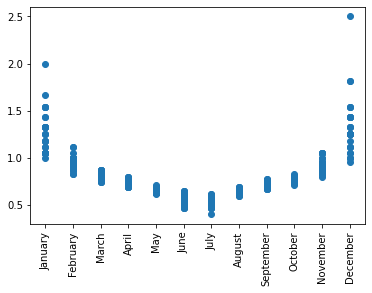

In [44]:
plt.scatter(df.Month, df.Rainfall)
plt.xticks(rotation = 90)
plt.show()

In [45]:
df.loc[df['Month'] == 'December'].Rainfall

Date
2017-12-01    1.00
2017-12-02    1.11
2017-12-03    1.18
2017-12-04    1.54
2017-12-05    1.82
2017-12-06    0.95
2017-12-07    1.05
2017-12-08    1.25
2017-12-09    1.43
2017-12-10    1.82
2017-12-11    1.11
2017-12-12    1.33
2017-12-13    1.43
2017-12-14    1.54
2017-12-15    1.05
2017-12-16    1.25
2017-12-17    1.33
2017-12-18    1.43
2017-12-19    1.00
2017-12-20    1.25
2017-12-21    1.33
2017-12-22    1.54
2017-12-23    1.11
2017-12-24    1.25
2017-12-25    1.25
2017-12-26    1.43
2017-12-27    1.00
2017-12-28    1.25
2017-12-29    1.25
2017-12-30    1.43
2017-12-31    2.50
Name: Rainfall, dtype: float64

In [47]:
df.loc['2017-12-01':'2017-12-30']['Rainfall'].mean()

1.290333333333333

In [48]:
df.loc['2017-01-01':'2017-01-31']['Rainfall'].mean()

1.2809677419354832

- Rainfall does have an upper outlier on 12.31.2017, but in general that is when the most rainfall occurs, this outlier should not be removed. 

---

In [42]:
get_lower_and_upper_bounds(df.Flyers, 1.5)

(4.0, 76.0)

In [49]:
df.Flyers.max()

80

In [51]:
df.Flyers.idxmax()

Timestamp('2017-07-14 00:00:00')

In [52]:
df.loc[df['Month'] == 'July']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July
2017-07-05,Wednesday,93.0,0.40,55,0.5,40,July
2017-07-06,Thursday,91.7,0.51,46,0.5,39,July
2017-07-07,Friday,82.5,0.57,41,0.5,35,July
2017-07-08,Saturday,83.2,0.57,44,0.5,34,July
2017-07-09,Sunday,77.9,0.59,44,0.5,33,July


- There is an upper outlier in Flyers, but it is within an acceptable range, so it will remain.

---

In [36]:
get_lower_and_upper_bounds(df.Sales, 1.5)

(5.0, 45.0)

In [37]:
df.groupby('Month')['Sales'].max()

Month
April         28
August        32
December      19
February      22
January       18
July         534
June          42
March         25
May           31
November      23
October       26
September     29
Name: Sales, dtype: int64

In [38]:
df.Sales.idxmax()

Timestamp('2017-07-04 00:00:00')

In [39]:
df.loc['2017-07-04'].Sales.max()

534

In [40]:
df.loc[df['Month'] == 'July']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July
2017-07-05,Wednesday,93.0,0.40,55,0.5,40,July
2017-07-06,Thursday,91.7,0.51,46,0.5,39,July
2017-07-07,Friday,82.5,0.57,41,0.5,35,July
2017-07-08,Saturday,83.2,0.57,44,0.5,34,July
2017-07-09,Sunday,77.9,0.59,44,0.5,33,July


- Sales does have an outlier, but since lemonade is typically a seasonal drink with increased sales in the summer, having most sales on 4th of July fits the scenario and it makes sense to keep the high outlier. 

---

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?

In [53]:
df = pd.read_csv('lemonade.csv')

In [54]:
numcols = ['Temperature', 'Rainfall', 'Flyers', 'Sales']

In [57]:
#find all observations > 2 standard deviations
for col in numcols:
    df['z_' + col] = (df[col] - df[col].mean()) /df[col].std()
    print(col)
    display(df[df['z_' + col].abs() > 2])
    print('~~~~~~~~~~~~~~~~\n')

Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temperature,z_Rainfall,z_Flyers,z_Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,-0.221847
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,0.456708
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,0.456708
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-0.674217


~~~~~~~~~~~~~~~~

Rainfall


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temperature,z_Rainfall,z_Flyers,z_Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-0.577281
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.986336,2.606983,-1.240647,-0.544968
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.566119,2.606983,-1.530787,-0.480344
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.582706,2.606983,-1.240647,-0.512656
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-0.512656
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,-1.604823,2.205363,-1.023042,-0.448032
19,1/20/17,Friday,31.6,1.43,20,0.5,12,-1.637998,2.205363,-1.458252,-0.512656
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,-1.803873,2.606983,-1.458252,-0.512656
337,12/4/17,Monday,34.9,1.54,16,0.5,13,-1.455535,2.606983,-1.748392,-0.480344
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-0.577281


~~~~~~~~~~~~~~~~

Flyers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temperature,z_Rainfall,z_Flyers,z_Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,0.424395
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.320109,-1.044114,2.168499,0.295147
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.828792,-1.299691,2.603709,0.424395
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
194,7/14/17,Friday,92.0,0.50,80,0.5,40,1.701621,-1.190158,2.893849,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,0.424395
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.541275,-1.153647,2.313569,0.295147
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.231642,-0.934581,2.095964,0.230523
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,0.489020


~~~~~~~~~~~~~~~~

Sales


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temperature,z_Rainfall,z_Flyers,z_Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,16.354275


~~~~~~~~~~~~~~~~

